In [3]:
from flatspin.model import SquareSpinIceClosed
from flatspin.model import KagomeSpinIce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

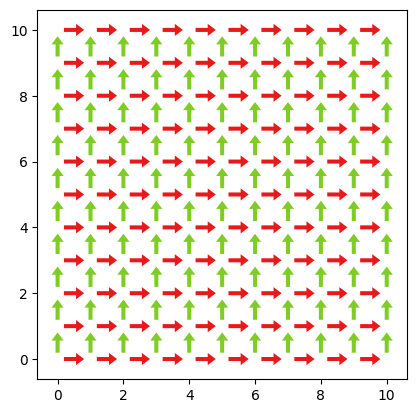

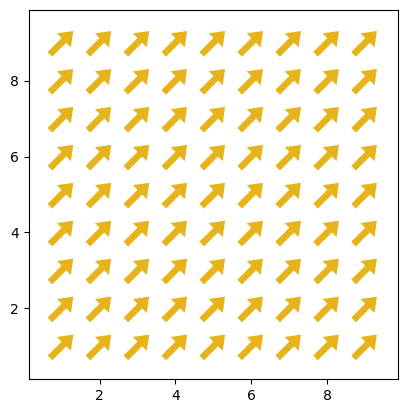

In [4]:
model = SquareSpinIceClosed(size=(10,10), init='polarize', disorder=0.05, use_opencl=True)
model.plot()
plt.figure()
model.plot_vertex_mag();

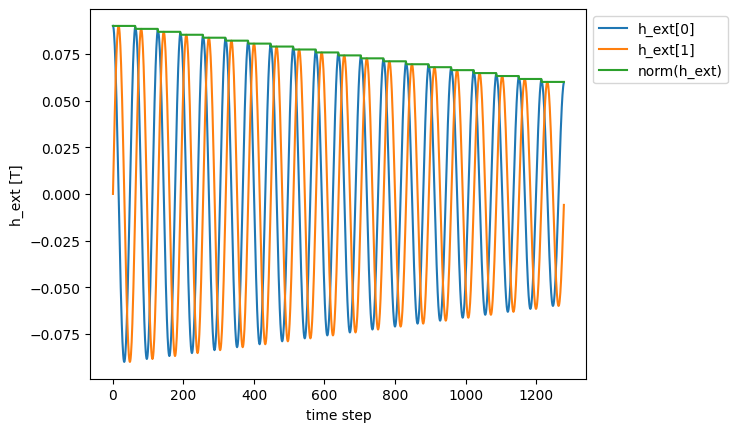

In [307]:
from flatspin.encoder import Rotate

timesteps = 64
enc_rotate = Rotate(H=0.09, H0=0.06, timesteps=timesteps)
input = np.linspace(1, 0, 20)

h_ext = enc_rotate(input)
H = np.linalg.norm(h_ext, axis=1)

plt.plot(h_ext[:,0], label="h_ext[0]")
plt.plot(h_ext[:,1], label="h_ext[1]")
plt.plot(np.linalg.norm(h_ext, axis=1), label="norm(h_ext)")
plt.xlabel("time step")
plt.ylabel("h_ext [T]")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));

Completed 3680 steps


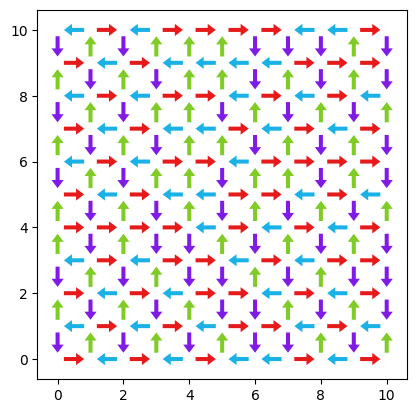

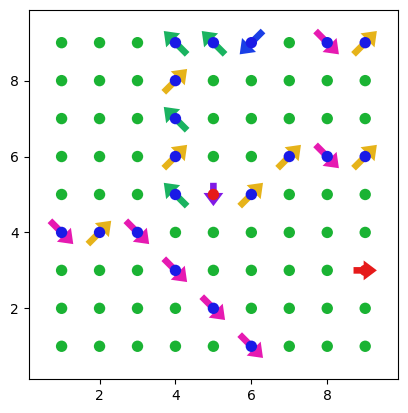

In [308]:
# Start in polarized state
model.polarize()

# Record spins, number of spin flips and dipolar energy over time
spins = []
flips = []
E_dip = []
for i, h in enumerate(h_ext):
    model.set_h_ext(h)
    s = model.relax()
    if (i+1) % timesteps == 0:
        # Record spin state at the end of each rotation
        spins.append(model.spin.copy())
    flips.append(s)
    E_dip.append(model.total_dipolar_energy())

model.plot()
plt.figure()
model.plot_vertex_mag()
model.plot_vertices()
print(f"Completed {sum(flips)} steps")

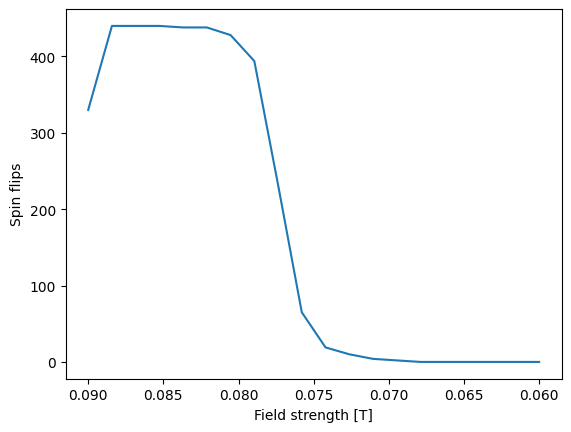

In [309]:
H = np.linalg.norm(h_ext, axis=-1).round(10)
df = pd.DataFrame({'H': H, 'flips': flips})
#display(df)
dd = df.groupby('H', sort=False).sum()
#display(dd)
dd.plot(legend=False)
plt.gca().invert_xaxis()
plt.ylabel("Spin flips")
plt.xlabel("Field strength [T]");

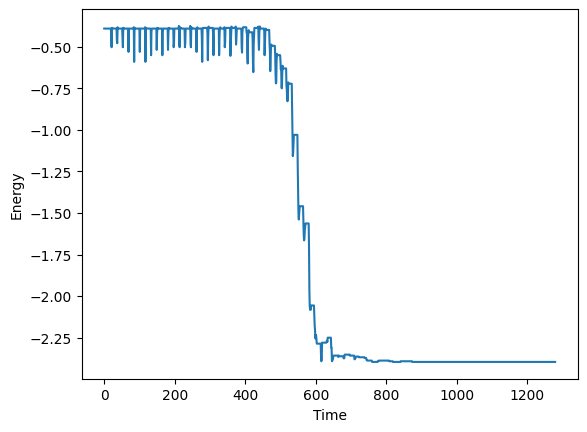

In [310]:
plt.plot(E_dip)
plt.ylabel("Energy")
plt.xlabel("Time");
#timesteps= np.arange(1,1281,1)
#plt.scatter(timesteps, E_dip, marker='.')

In [311]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()

def animate_spin(i):
    H = np.linalg.norm(h_ext[(i+1) * timesteps - 1])
    ax.set_title(f"H={H:.3f} [T]")
    model.set_spin(spins[i])
    model.plot_vertex_mag(ax=ax, replace=True)
        
anim = FuncAnimation(fig, animate_spin, frames=len(spins), interval=200, blit=False)
plt.close() # Only show the animation
HTML(anim.to_jshtml())

SINE

Completed 1051 steps


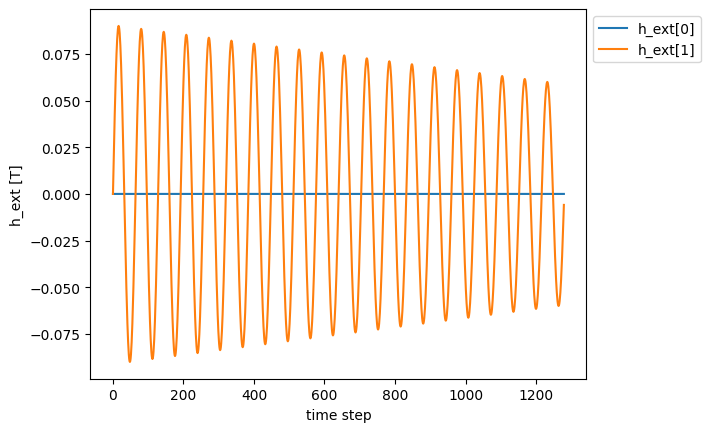

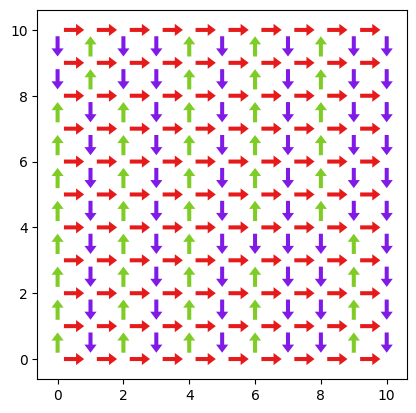

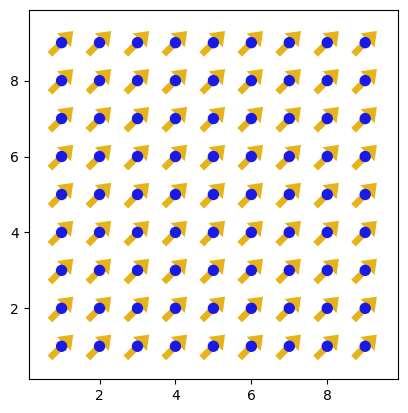

In [6]:
from flatspin.encoder import Sine

# Start in polarized state
model_sine = SquareSpinIceClosed(size=(10,10), init='polarize', disorder=0.05, use_opencl=True)

timesteps = 64
enc_sine = Sine(H=0.09, H0=0.06, timesteps=timesteps, phi=90)
input = np.linspace(1, 0, 20)

h_ext = enc_sine(input)
H = np.linalg.norm(h_ext, axis=1)

plt.figure()
plt.plot(h_ext[:,0], label="h_ext[0]")
plt.plot(h_ext[:,1], label="h_ext[1]")
#plt.plot(np.linalg.norm(h_ext, axis=1), label="norm(h_ext)")
plt.xlabel("time step")
plt.ylabel("h_ext [T]")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));

# Record spins, number of spin flips and dipolar energy over time
spins = []
flips = []
E_dip = []

for i, h in enumerate(h_ext):
    model_sine.set_h_ext(h)
    s = model_sine.relax()
    if (i+1) % timesteps == 0:
        # Record spin state at the end of each rotation
        spins.append(model_sine.spin.copy())
    flips.append(s)
    E_dip.append(model_sine.total_dipolar_energy())

plt.figure()
model_sine.plot()
plt.figure()
model.plot_vertex_mag()
model.plot_vertices()
print(f"Completed {sum(flips)} steps")

<Figure size 640x480 with 0 Axes>

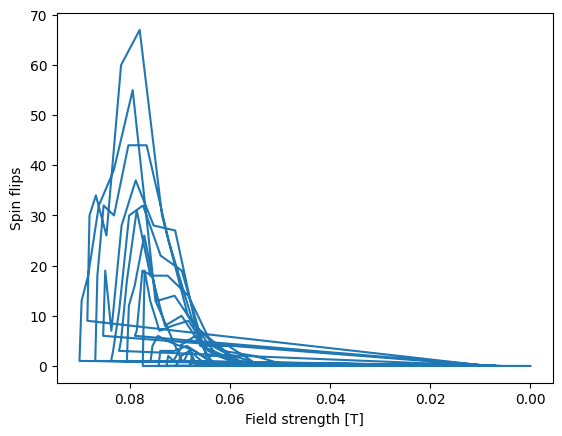

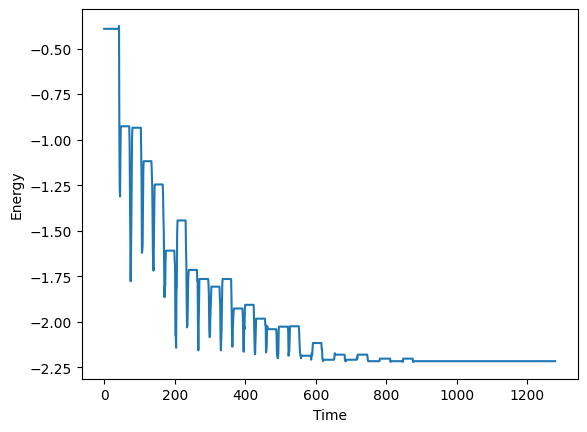

In [262]:
H = np.linalg.norm(h_ext, axis=-1).round(10)
df = pd.DataFrame({'H': H, 'flips': flips})
dd = df.groupby('H', sort=False).sum()

plt.figure()
dd.plot(legend=False)
plt.gca().invert_xaxis()
plt.ylabel("Spin flips")
plt.xlabel("Field strength [T]");
plt.figure()
plt.plot(E_dip)
plt.ylabel("Energy")
plt.xlabel("Time");

SINE Multi Angle

' plt.plot(E_dip, label=f\'phi = {theta}\')\n    plt.ylabel("Energy")\n    plt.xlabel("Time");\n    plt.legend()'

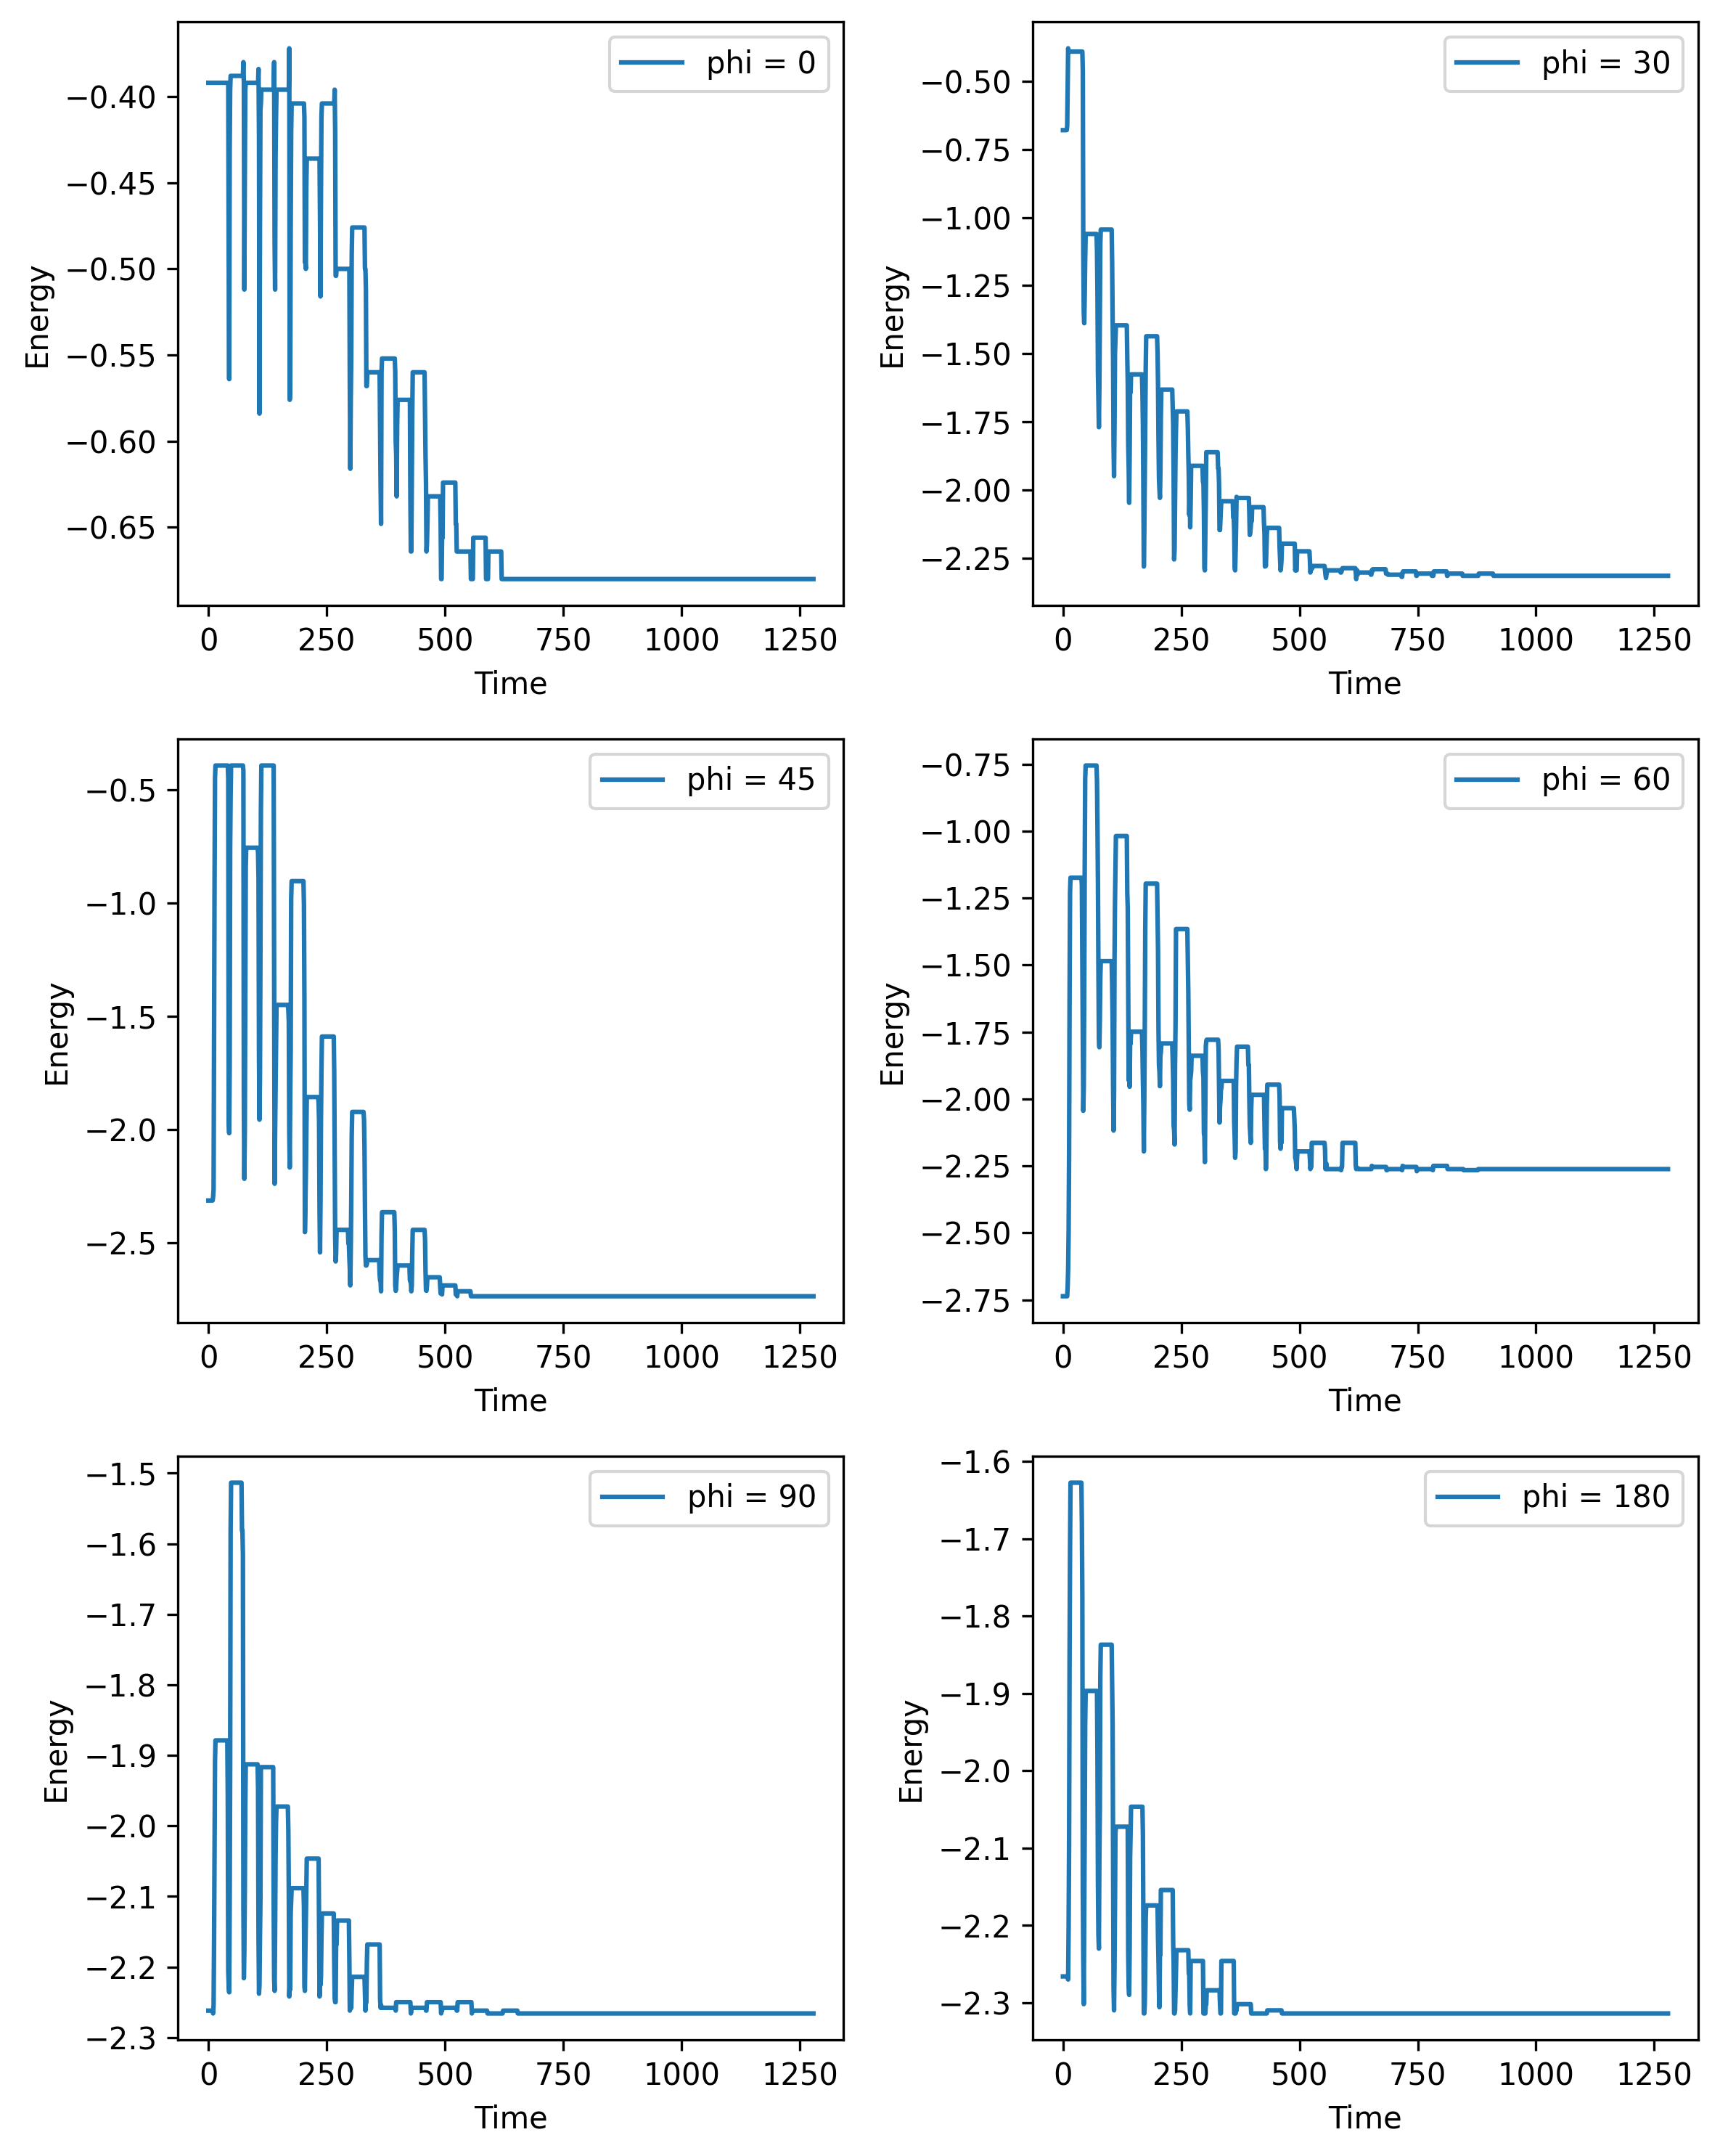

In [263]:
from flatspin.encoder import Sine

# Start in polarized state
model_sine2 = SquareSpinIceClosed(size=(10,10), init='polarize', disorder=0.05, use_opencl=True)

timesteps = 64
input = np.linspace(1, 0, 20)
thetas = [0,30,45,60,90,180]
spins = []
flips = []
plt.figure(dpi=300, figsize=(8,10))
for j, theta in enumerate(thetas):
    E_dip = []
    enc_sine2 = Sine(H=0.09, H0=0.06, timesteps=timesteps, phi=theta)
    h_ext = enc_sine2(input)
    for i, h in enumerate(h_ext):
        model_sine2.set_h_ext(h)
        s = model_sine2.relax()
        if (i+1) % timesteps == 0:
            # Record spin state at the end of each rotation
            spins.append(model_sine2.spin.copy())
        flips.append(s)
        E_dip.append(model_sine2.total_dipolar_energy())
    plt.subplot(3,2,j+1)
    plt.plot(E_dip, label=f'phi = {theta}')
    plt.legend()
    plt.ylabel("Energy")
    plt.xlabel("Time");
    plt.tight_layout()

''' plt.plot(E_dip, label=f'phi = {theta}')
    plt.ylabel("Energy")
    plt.xlabel("Time");
    plt.legend()'''



ROTATE Multi disorder

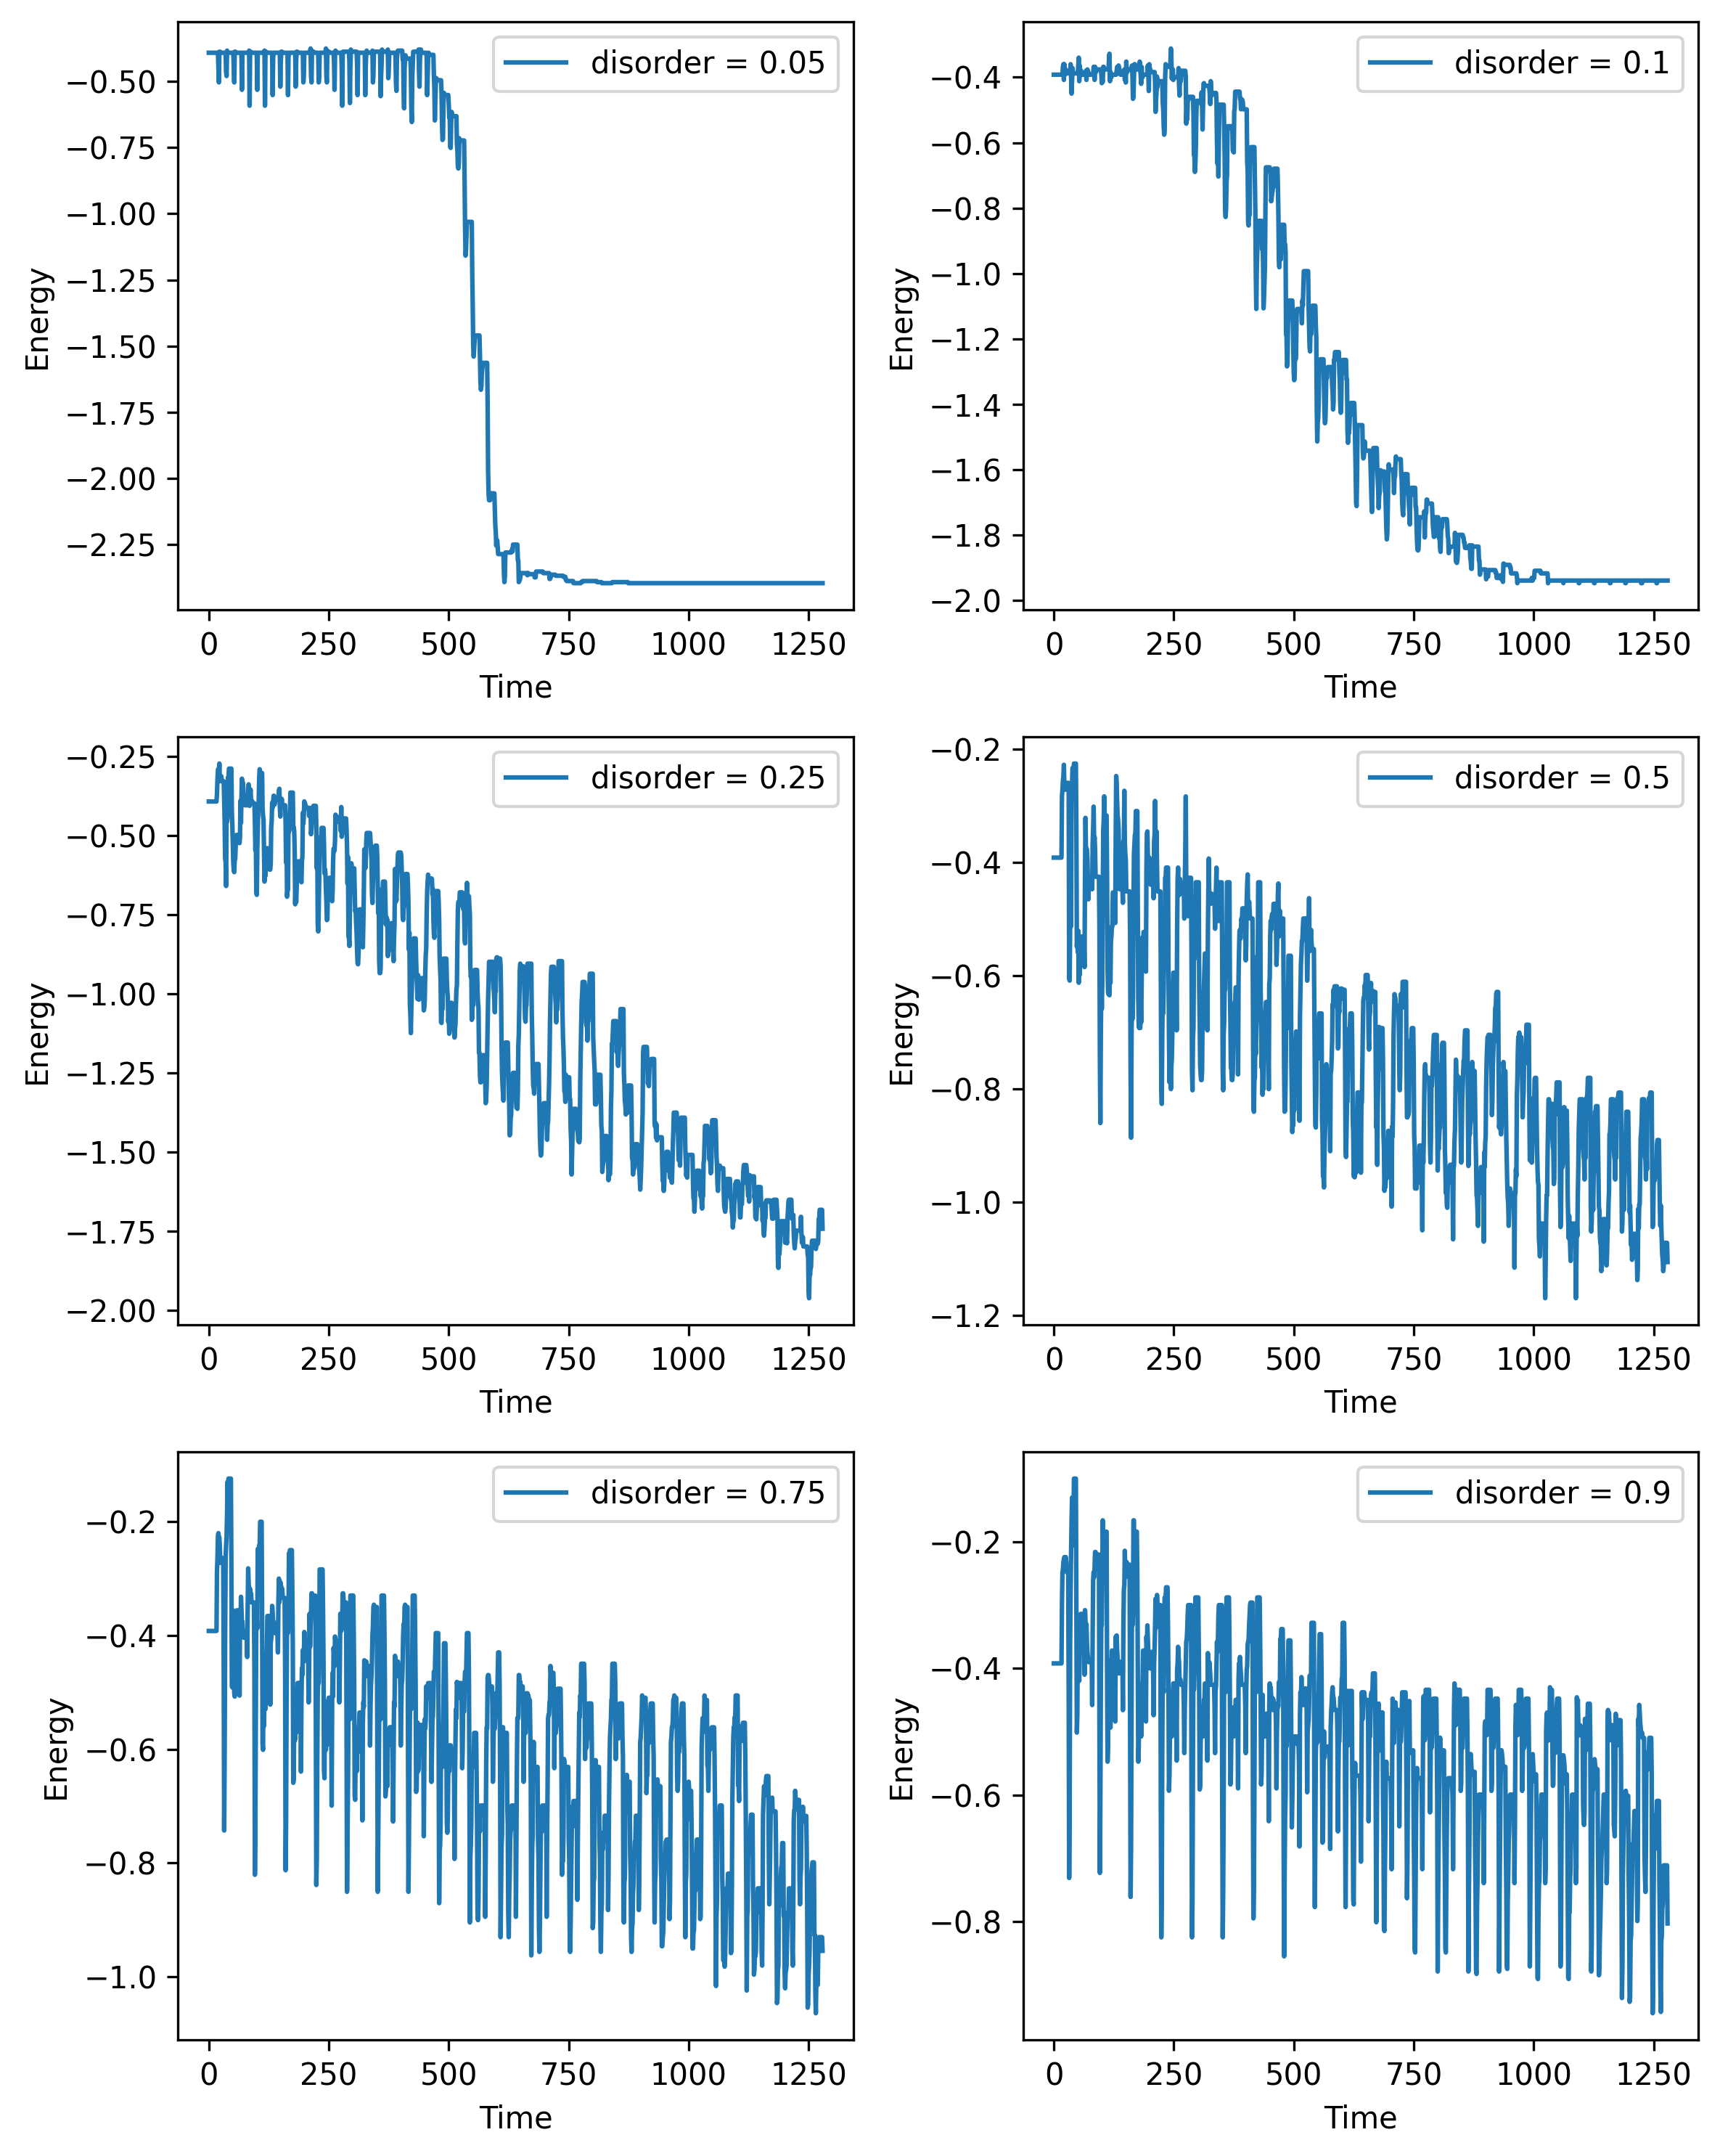

In [264]:
from flatspin.encoder import Rotate

timesteps = 64
enc3 = Rotate(H=0.09, H0=0.06, timesteps=timesteps, phi=theta)
input = np.linspace(1, 0, 20)
h_ext = enc3(input)

disoders = [0.05,0.1,0.25,0.5,0.75,0.9]
spins = []
flips = []

plt.figure(dpi=300, figsize=(8,10))
for j,d in enumerate(disoders):
    model3 = SquareSpinIceClosed(size=(10,10), init='polarize', disorder=d, use_opencl=True)
    E_dip = []
    for i, h in enumerate(h_ext):
        model3.set_h_ext(h)
        s = model3.relax()
        if (i+1) % timesteps == 0:
            # Record spin state at the end of each rotation
            spins.append(model3.spin.copy())
        flips.append(s)
        E_dip.append(model3.total_dipolar_energy())
    plt.subplot(3,2,j+1)
    plt.plot(E_dip, label=f'disorder = {d}')
    plt.legend()

    plt.ylabel("Energy")
    plt.xlabel("Time");
    plt.tight_layout()

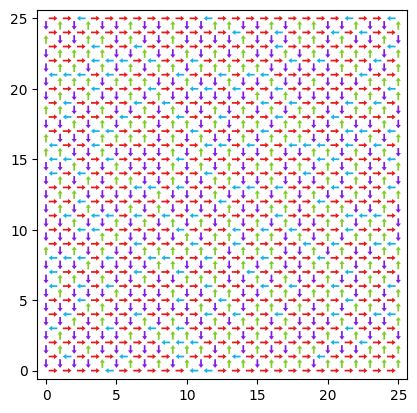

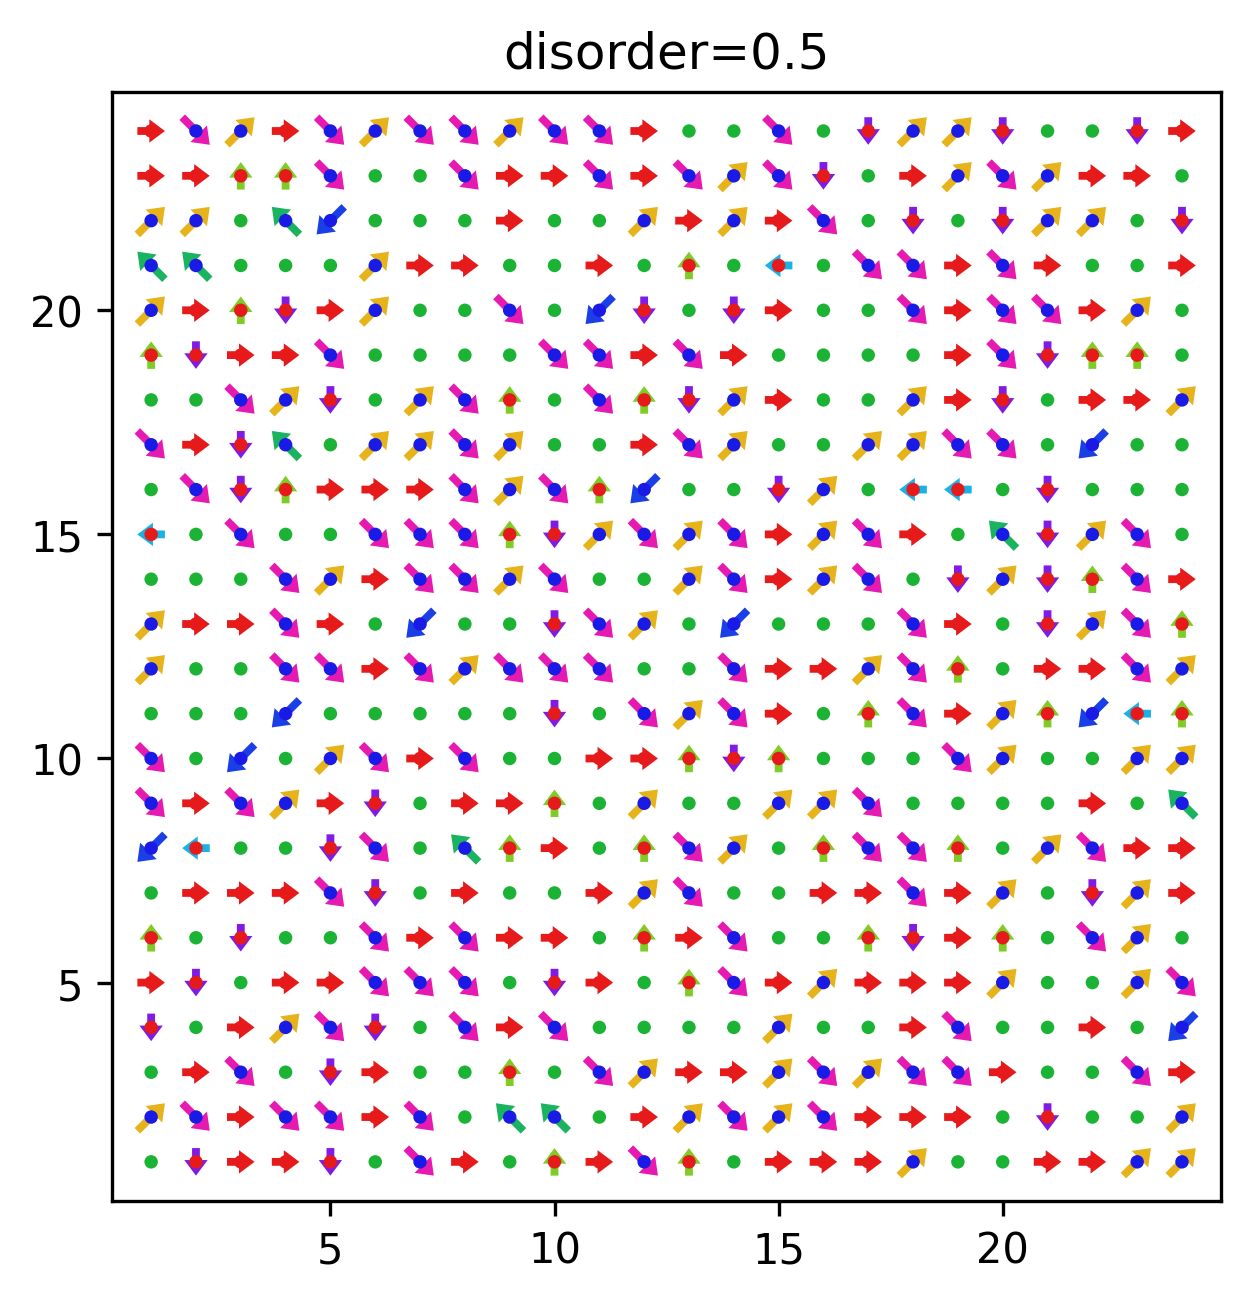

In [266]:

d=0.5
model = SquareSpinIceClosed(size=(25,25), init='polarize', disorder=d, use_opencl=True)

timesteps = 64
enc_rotate = Rotate(H=0.09, H0=0.06, timesteps=timesteps)
input = np.linspace(1, 0, 20)
h_ext = enc_rotate(input)

spins = []
flips = []
E_dip = []
for i, h in enumerate(h_ext):
    model.set_h_ext(h)
    s = model.relax()
    if (i+1) % timesteps == 0:
        # Record spin state at the end of each rotation
        spins.append(model.spin.copy())
    flips.append(s)
    E_dip.append(model.total_dipolar_energy())

model.plot()
plt.figure(dpi=300)
plt.title(f'disorder={d}')
model.plot_vertex_mag()
model.plot_vertices()

ROTATE PULSE

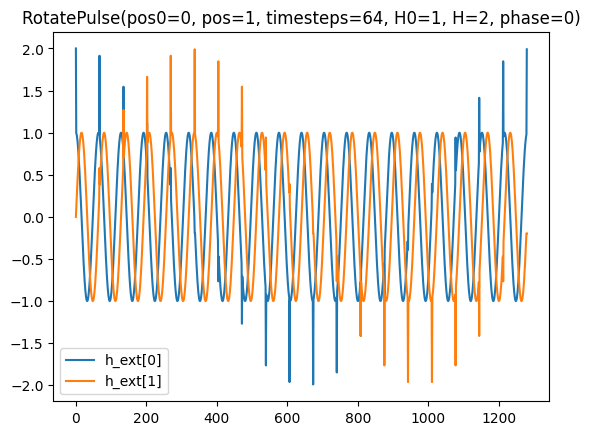

In [284]:
from flatspin.encoder import RotatePulse

model_rot_pulse = SquareSpinIceClosed(size=(10,10), init='polarize', disorder=0.05, use_opencl=True)

enc_rot_pulse = RotatePulse()
enc_rot_pulse.set_params(H0=1, H=2, pos0=0, pos=1, timesteps=64)
input = np.linspace(0,1,20,endpoint=True)
h_ext = enc_rot_pulse(input)

plt.figure()
plt.title(str(enc_rot_pulse))
plt.plot(h_ext[:,0], label="h_ext[0]")
plt.plot(h_ext[:,1], label="h_ext[1]")
plt.legend();

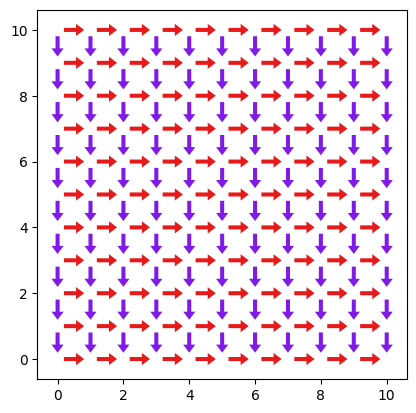

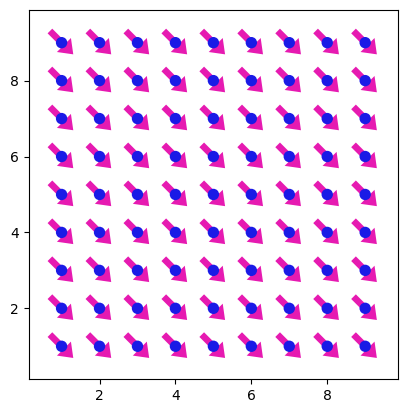

In [283]:
spins = []
flips = []
E_dip = []
for i, h in enumerate(h_ext):
    model_rot_pulse.set_h_ext(h)
    s = model_rot_pulse.relax()
    if (i+1) % timesteps == 0:
        # Record spin state at the end of each rotation
        spins.append(model_rot_pulse.spin.copy())
    flips.append(s)
    E_dip.append(model_rot_pulse.total_dipolar_energy())

model_rot_pulse.plot()
plt.figure()
model_rot_pulse.plot_vertex_mag()
model_rot_pulse.plot_vertices()

<Figure size 640x480 with 0 Axes>

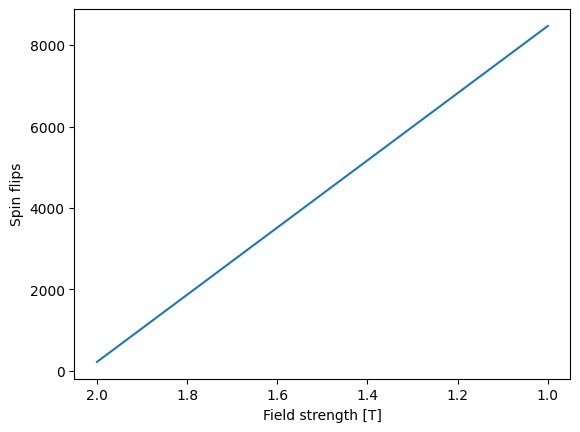

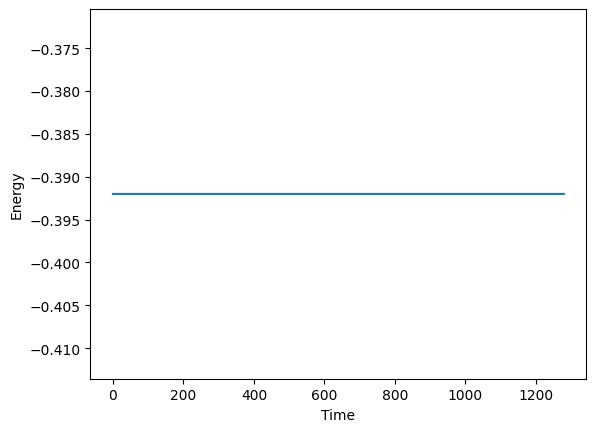

In [281]:
H = np.linalg.norm(h_ext, axis=-1).round(10)
df = pd.DataFrame({'H': H, 'flips': flips})
dd = df.groupby('H', sort=False).sum()

plt.figure()
dd.plot(legend=False)
plt.gca().invert_xaxis()
plt.ylabel("Spin flips")
plt.xlabel("Field strength [T]");
plt.figure()
plt.plot(E_dip)
plt.ylabel("Energy")
plt.xlabel("Time");

KAGOME

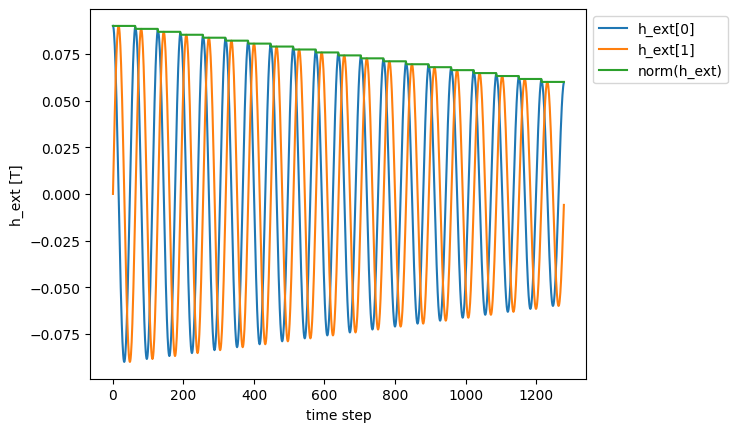

In [296]:
from flatspin.model import KagomeSpinIce 
from flatspin.encoder import Rotate

model_kag_rot = KagomeSpinIce(size=(10,10), init='polarize', disorder=0.05, use_opencl=True)

timesteps = 64
enc_rotate = Rotate(H=0.09, H0=0.06, timesteps=timesteps)
input = np.linspace(1, 0, 20)

h_ext = enc_rotate(input)
H = np.linalg.norm(h_ext, axis=1)

plt.plot(h_ext[:,0], label="h_ext[0]")
plt.plot(h_ext[:,1], label="h_ext[1]")
plt.plot(np.linalg.norm(h_ext, axis=1), label="norm(h_ext)")
plt.xlabel("time step")
plt.ylabel("h_ext [T]")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));

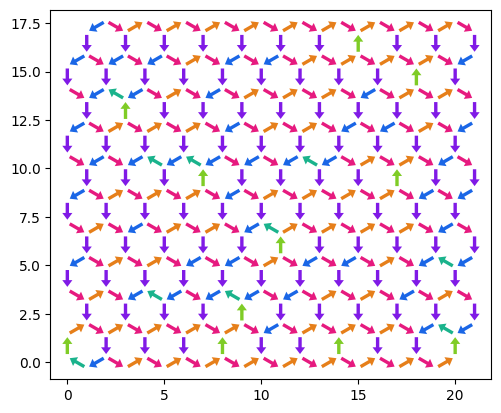

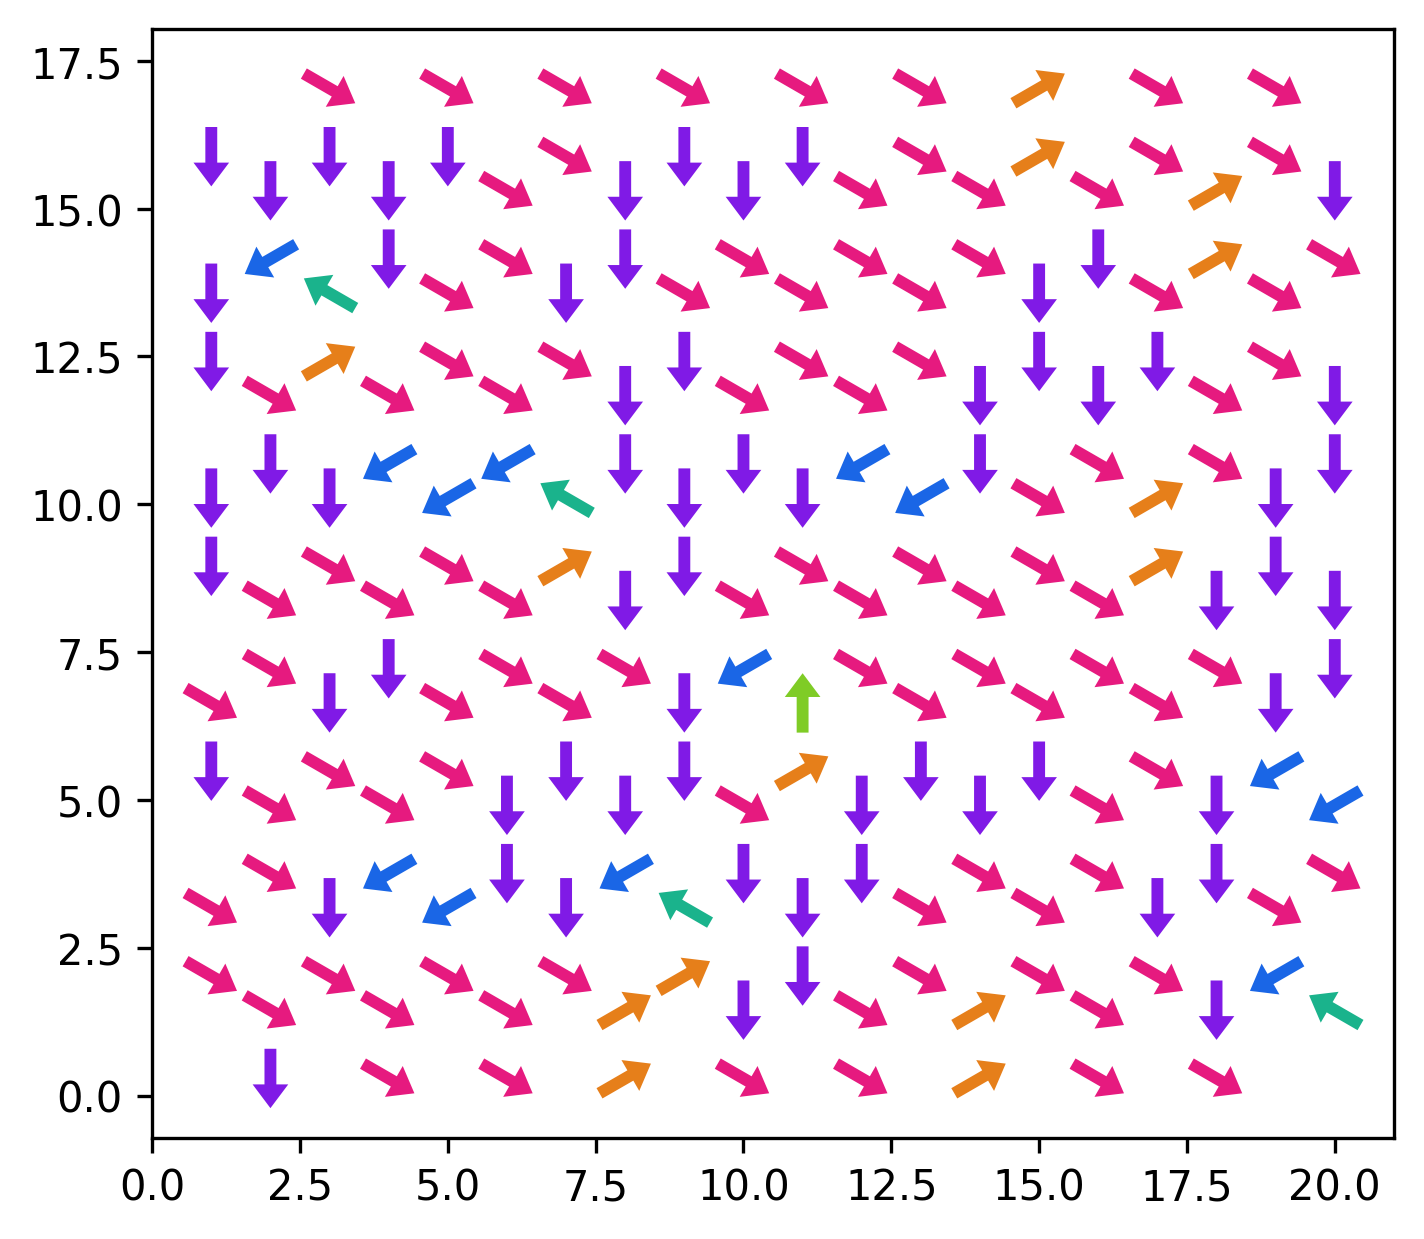

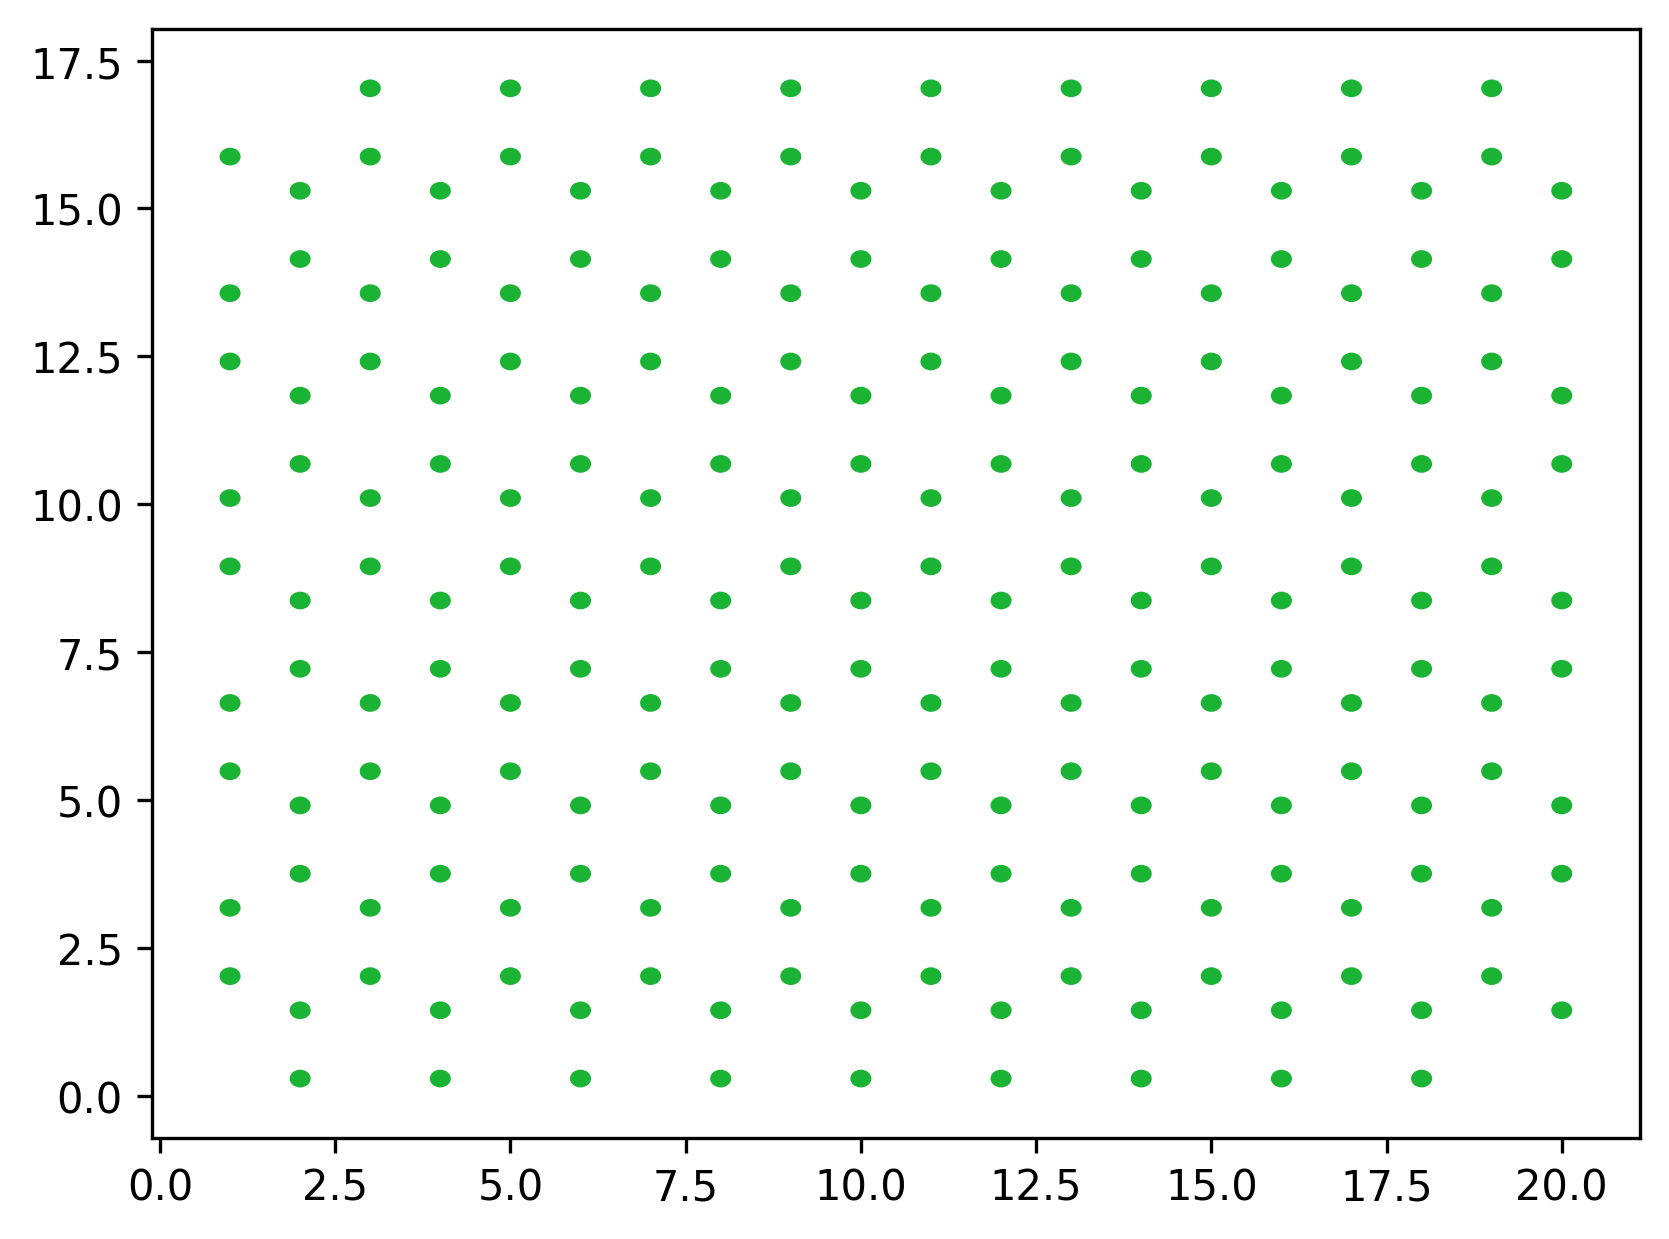

In [312]:
spins = []
flips = []
E_dip = []
for i, h in enumerate(h_ext):
    model_kag_rot.set_h_ext(h)
    s = model_kag_rot.relax()
    if (i+1) % timesteps == 0:
        # Record spin state at the end of each rotation
        spins.append(model_kag_rot.spin.copy())
    flips.append(s)
    E_dip.append(model_kag_rot.total_dipolar_energy())

model_kag_rot.plot()
plt.figure(dpi=300)
model_kag_rot.plot_vertex_mag()
plt.figure(dpi=300)
model_kag_rot.plot_vertices()

<Figure size 640x480 with 0 Axes>

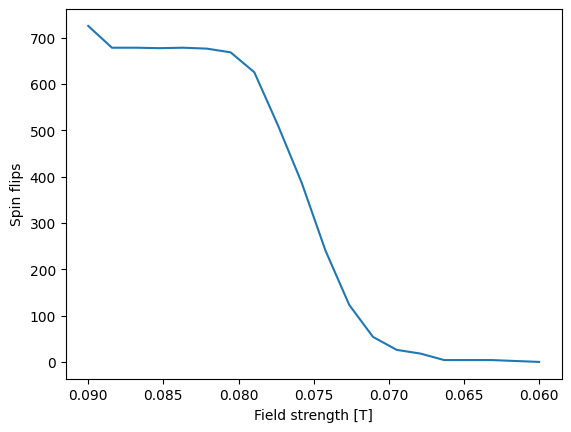

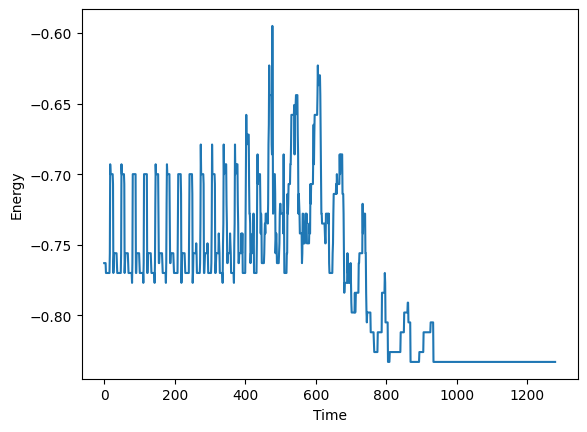

In [313]:
H = np.linalg.norm(h_ext, axis=-1).round(10)
df = pd.DataFrame({'H': H, 'flips': flips})
dd = df.groupby('H', sort=False).sum()

plt.figure()
dd.plot(legend=False)
plt.gca().invert_xaxis()
plt.ylabel("Spin flips")
plt.xlabel("Field strength [T]");
plt.figure()
plt.plot(E_dip)
plt.ylabel("Energy")
plt.xlabel("Time");

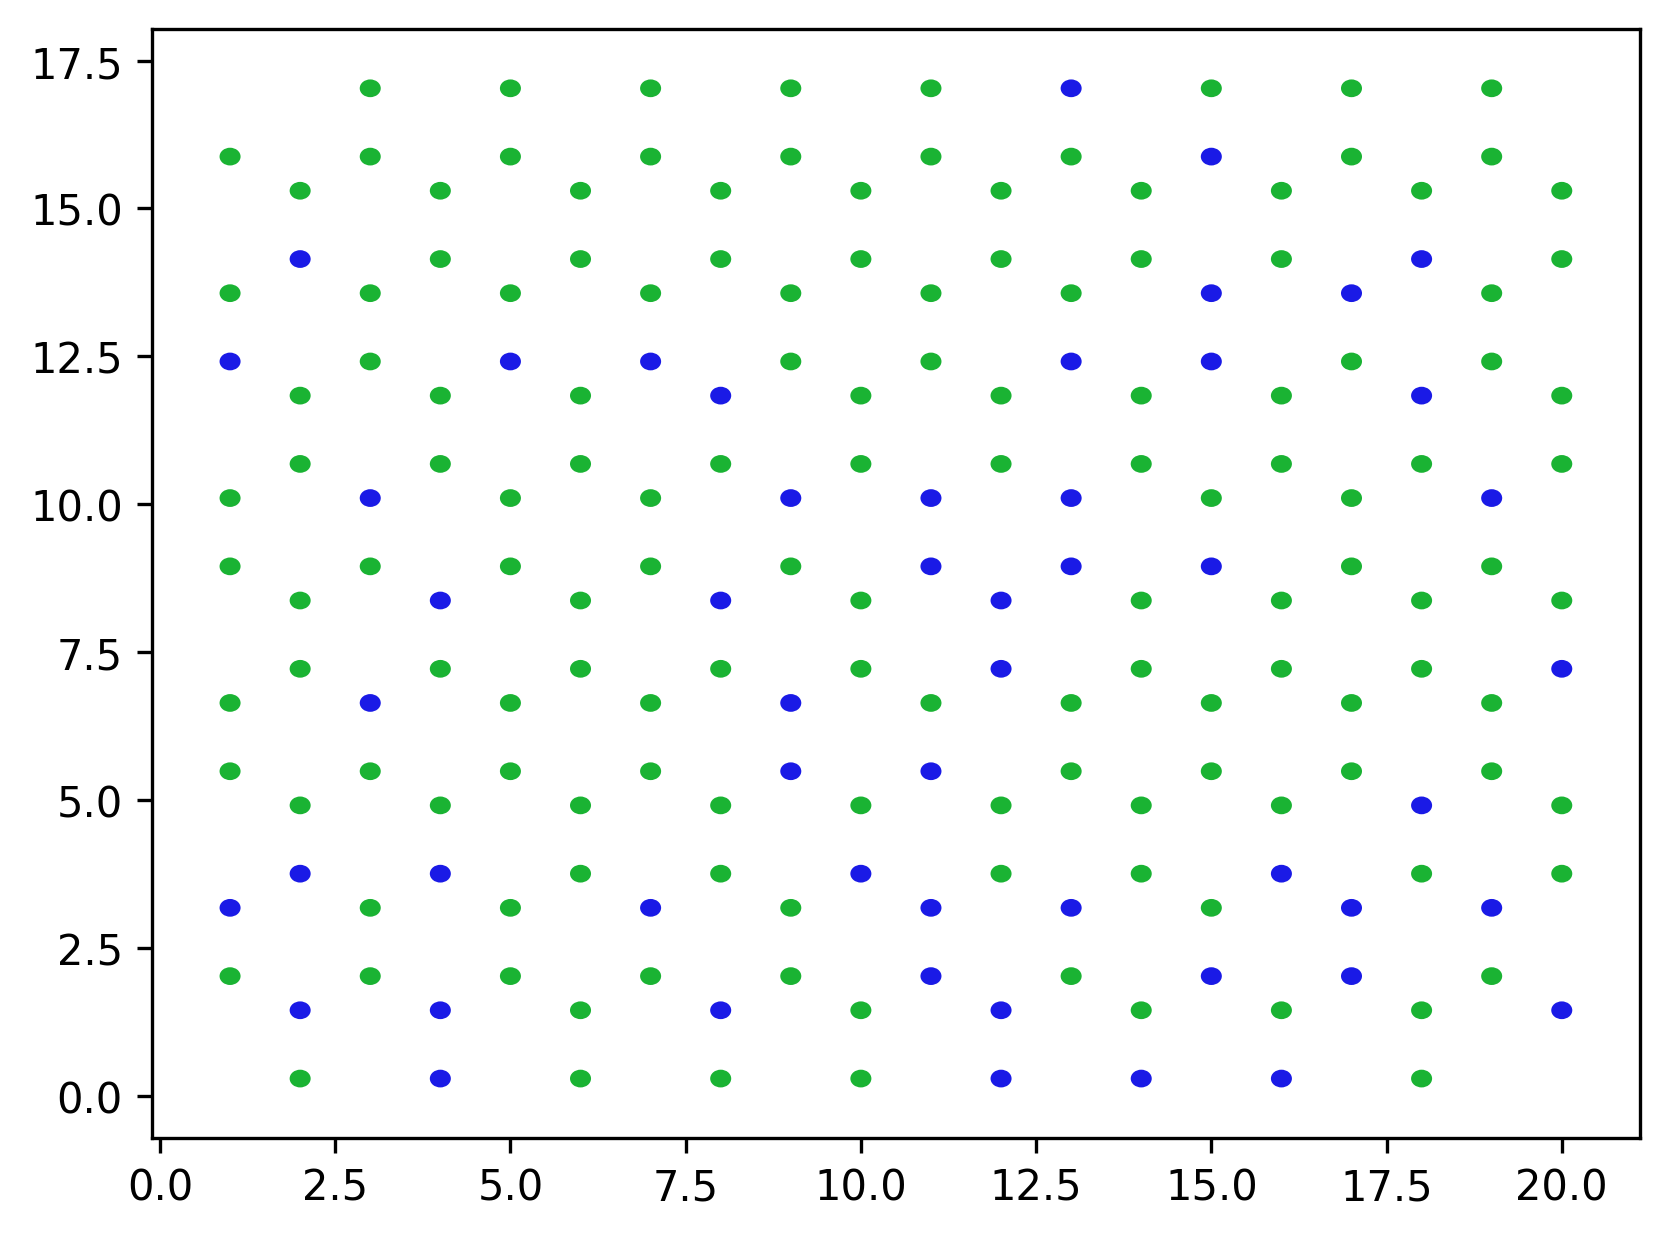

In [318]:
md = KagomeSpinIce(init='random', size=(10,10))
plt.figure(dpi=300)
md.plot_vertices()